In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids


In [2]:
def normalization(arr):
    norm=[] #Create empty restoring place
    cols=len(arr[0])
    for i in range(cols):
        print(f'Col #{i}:', end=' ')
        norm.append((arr[:,i]-arr[:,i].min())/(arr[:,i].max()-arr[:,i].min()))
        print(norm[i])
    return norm

def reshaped(arr):
    col=len(arr)
    row=len(arr[0])
    print(f'Inf {row} rows, {col} cols')
    arr=np.array(arr)
    res=np.array([[None]*col]*row)
    # print(res.shape)
    for i in range(len(arr)):
        res[:,i]=arr[i]
    print(f'Reshaped array: \n', res)
    return res

def accuracy(true_labels, predicted_labels):
    return ((true_labels == predicted_labels+1).sum() / len(true_labels))*100

def compare_labels(labels1, labels2):
    if labels1>labels2:
        print(f'label 1:{labels1} > label 2:{labels2}')
    elif labels1<labels2:
        print(f'label 1:{labels1} < label 2:{labels2}')
    else:
        print(f'label 1:{labels1} = label 2:{labels2}')

In [3]:
dt=pd.read_csv('BankNotes_fulldata.arff')
dt.head()

,V1,V2,V3,V4,Class (target)
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [4]:
truth=dt['Class (target)']
dt.drop('Class (target)', axis=1, inplace=True) #Removing the target column

In [5]:
cols=dt.shape[1] # number of columns
rows=dt.shape[0] # number of rows

In [6]:
#Range of each features

means=[]
stds=[]
for i in range(cols):
    vCol=dt[f'V{i+1}']
    print(f'V{i+1} \n Range: {vCol.max()-vCol.min()}, Mean: {vCol.mean()}, Std: {vCol.std()}')

V1 
 Range: 13.8669, Mean: 0.43373525728862977, Std: 2.8427625862451658
V2 
 Range: 26.7247, Mean: 1.9223531209912539, Std: 5.869046743580378
V3 
 Range: 23.2135, Mean: 1.397627116618076, Std: 4.310030090315984
V4 
 Range: 10.9977, Mean: -1.1916565211370262, Std: 2.1010131367390685


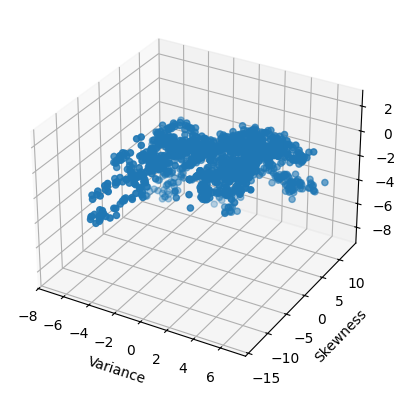

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')


ax.scatter(dt['V1'],dt['V2'],dt['V4'])
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.set_zlabel('Entropy')

plt.show()

In [8]:
taken_data=dt[['V1', 'V2', 'V4']]

In [20]:
#Because, with my norm function it returned the array with shape [[values of col 1],[values of col 2],...,[values of col n]] which is difference from our origin input for K-Means
#With the reshaped function it will transform the data from [[a1, a2, ..., an], [b1, b2, ..., bn]]
#to
# [[a1, b1],
#  [a2, b2],
#  ...
#  [an, bn]]
norm = reshaped(normalization(taken_data.values))

scaler=StandardScaler()
scaler_data=scaler.fit_transform(taken_data)

Col #0: [0.76900389 0.83565902 0.78662859 ... 0.23738543 0.25084193 0.32452819]
Col #1: [0.83964273 0.82098209 0.41664827 ... 0.01176814 0.20170105 0.49074676]
Col #2: [0.73662766 0.64432563 0.78695091 ... 0.52475518 0.6606745  0.88594888]
Inf 1372 rows, 3 cols
Reshaped array: 
 [[0.7690038869538253 0.8396427275142472 0.7366276585104158]
 [0.835659015353107 0.8209820877315742 0.6443256317229966]
 [0.7866285903842964 0.41664826920414444 0.78695090791711]
 ...
 [0.23738542861057624 0.011768139586225437 0.5247551760822717]
 [0.25084193294824364 0.20170104809408523 0.660674504669158]
 [0.32452819303521335 0.4907467623584175 0.8859488802204096]]


In [21]:
meansNorm=[]
stdsNorm=[]
for i in range(norm.shape[1]):
    vCol=norm[:,i]
    print(f'Col {i+1} \n Range: {vCol.max()-vCol.min()}, Mean: {vCol.mean()}, Std: {vCol.std()}')

Col 1 
 Range: 1.0, Mean: 0.5391136632764809, Std: 0.2049287443629144
Col 2 
 Range: 1.0, Mean: 0.5873013774145724, Std: 0.21953127587108529
Col 3 
 Range: 1.0, Mean: 0.66891654426498, Std: 0.19097150511731742


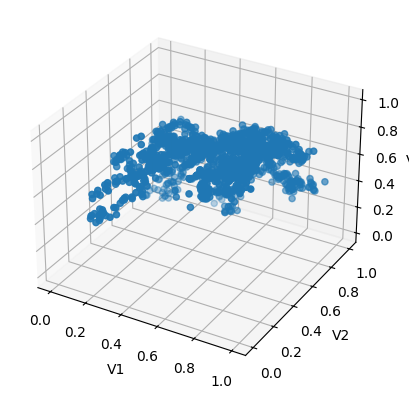

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')


ax.scatter(norm[:,0], norm[:,1],norm[:,2])
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V4')

plt.show()

In [23]:
# oldNorm=np.array([norm[:,0], norm[:,1]]) #With V1 and V2 only (For compared)
# norm=reshaped(oldNorm)

In [24]:
#Apply K-means clustering to the min-max normalized data
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
km_res=kmeans.fit(norm)

#Apply K-means clustering to the z-score normalized data

kmeans_z = KMedoids(n_clusters=2, init='k-means++', random_state=42, metric='manhattan')
km_res_z=kmeans.fit(scaler_data)


In [25]:
labels=km_res.labels_ #Getting the labels of each data point
labels_z=km_res_z.labels_ #Getting the labels of each data point

C:\Users\DELL\AppData\Local\Temp\ipykernel_30072\2524564833.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(dt.iloc[i][1], dt.iloc[i][0], color=colors[labels[i]])


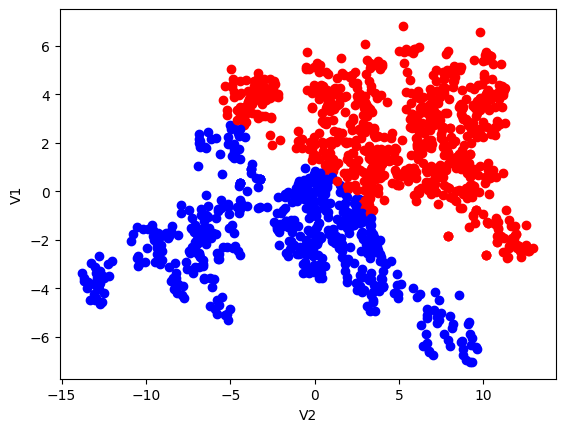

In [26]:
plt.xlabel('V2')
plt.ylabel('V1')
colors=['red','blue','green','pink']
# Loop through each cluster
for i in range(rows):
    plt.scatter(dt.iloc[i][1], dt.iloc[i][0], color=colors[labels[i]])

C:\Users\DELL\AppData\Local\Temp\ipykernel_30072\2632219454.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(dt.iloc[i][1], dt.iloc[i][0], color=colors[labels_z[i]])


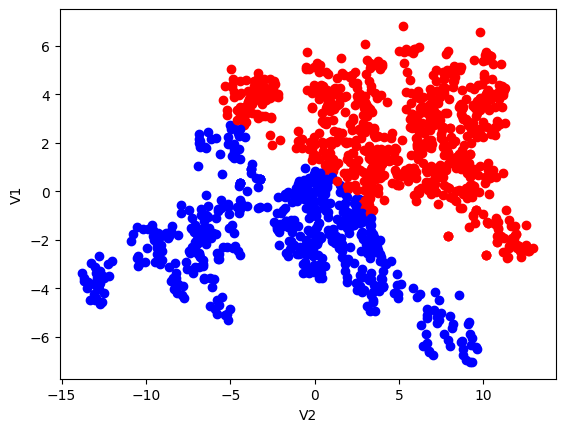

In [27]:

plt.xlabel('V2')
plt.ylabel('V1')
colors=['red','blue','green','pink']
# Loop through each cluster
for i in range(rows):
    plt.scatter(dt.iloc[i][1], dt.iloc[i][0], color=colors[labels_z[i]])

In [28]:
labels1=accuracy(truth, km_res.labels_)
labels2=accuracy(truth, km_res_z.labels_)
compare_labels(labels1, labels2)

label 1:86.58892128279884 = label 2:86.58892128279884


label 1:86.58892128279884 = label 2:86.58892128279884 With old_norm (V1,V2 only)
label 1:86.58892128279884 = label 2:86.58892128279884 With old_norm (V1,V2,V4)
